# Using ffmpeg

Our project requires that we transform our `.mp3` audios to `.wav`. 

To do that, we chose the pydub lib to do the job. But, this library requires a few other things to work properly, one of them is the ffmpeg, a framework to decode, encode, transcode, mux, demux, stream, filter and play different type of files. 

---

## Using it on Windows
To install it is quite simple, you just need to [download the library](https://www.gyan.dev/ffmpeg/builds/), extract it somewhere easy to find, and add the `bin` folder to your `path`. 

In [1]:
from pydub import AudioSegment
from scipy.io import wavfile
from tempfile import mktemp
import matplotlib.pyplot as plt 
import numpy as np

mp3_audio = AudioSegment.from_file('canário-da-terra_4.mp3', format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, data = wavfile.read(wname)  # read wav file


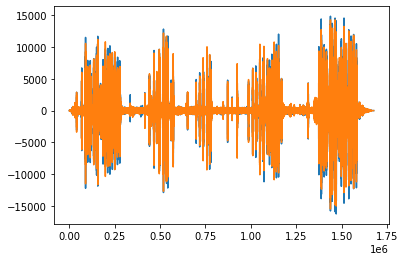

In [2]:
# As we can see on the this plot, wave files can have multiple layers
plt.plot(data, '-')

## NOTE
As it can be seen on the chart above, wave files can have multiple channels (stereo). 

We will need to verify the files and then convert the ones that are stereo.

In [4]:
import IPython.display as ipd
ipd.Audio("canário-da-terra_4.mp3")

In [5]:
def convert_to_stereo(data):
    """ 
    returns: the first layer of an stereo audio
    """
    # Unzips data, then create a list, and get just the first position
    # that will return just the first channel in the audio, making a mono
    channel_one = list(list(zip(*data))[0])
    return np.asarray(channel_one)

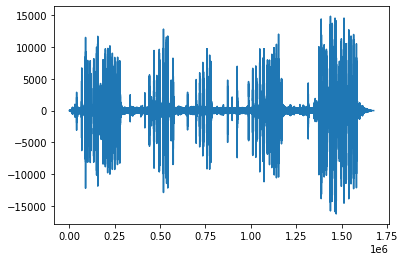

In [6]:
channel_one = convert_to_stereo(data)
plt.plot(channel_one, '-')

C:\Users\renan\anaconda3\envs\studying\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


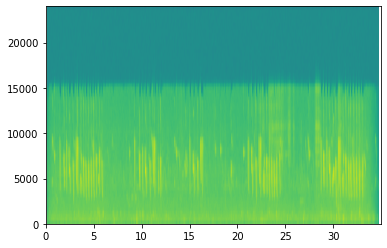

In [7]:
plt.specgram(channel_one, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.show()